# Problem 3
Solve the given LP using PuLP

In [1]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 4.7 MB/s 


In [2]:
from pulp import *

# Initialize LP model
model = LpProblem("problem3", LpMaximize)

# Initialize optimization variables
x1 = LpVariable("x", 0, None, LpInteger)
x2 = LpVariable("y", 0, None, LpInteger) 

# Create maximize objective function
model += 4 * x1 + 3 * x2

# Declare constraints
model += x1 + 2*x2 <= 14, "c1"
model += 3*x1 - x2 >= 0, "c2"
model += x1 - x2 <= 2, "c3"

model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

x = 6.0
y = 4.0


# Problem 5
Load and analyze a graph using NetworkX

In [3]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

data = open('lastfm_asia_edges.csv', "r")

g = nx.parse_edgelist(data, delimiter=',', create_using=nx.Graph(),
                      nodetype=int, data=((int, int),))

print(nx.info(g))

Graph with 7624 nodes and 27806 edges


Note that for the above to work properly, students must handle the first row properly (ie. either skip over or remove the column headers so NetworkX can read the edge list).

In [19]:
p = nx.shortest_path_length(g,source=0)
print(p)

{0: 0, 747: 1, 4704: 2, 3683: 2, 5892: 2, 2020: 2, 5610: 2, 3855: 2, 6363: 2, 1025: 3, 3075: 3, 6148: 3, 2056: 3, 521: 3, 7182: 3, 1040: 3, 4629: 3, 7193: 3, 538: 3, 7194: 3, 6172: 3, 4126: 3, 7199: 3, 5662: 3, 5676: 3, 4146: 3, 6709: 3, 6202: 3, 1598: 3, 6207: 3, 3136: 3, 3134: 3, 3655: 3, 2120: 3, 1610: 3, 75: 3, 6222: 3, 3158: 3, 5206: 3, 7256: 3, 95: 3, 97: 3, 2659: 3, 1635: 3, 1133: 3, 2158: 3, 4720: 3, 5745: 3, 6770: 3, 5236: 3, 636: 3, 3204: 3, 3210: 3, 2191: 3, 4243: 3, 2195: 3, 4755: 3, 5277: 3, 1693: 3, 5790: 3, 3234: 3, 6312: 3, 3757: 3, 2738: 3, 7352: 3, 6329: 3, 1721: 3, 5314: 3, 5324: 3, 7374: 3, 1746: 3, 5330: 3, 2260: 3, 734: 3, 3296: 3, 4330: 3, 6378: 3, 3822: 3, 750: 3, 5876: 3, 760: 3, 3833: 3, 2299: 3, 1789: 3, 1792: 3, 257: 3, 5378: 3, 4865: 3, 3845: 3, 2832: 3, 6419: 3, 5909: 3, 4887: 3, 1305: 3, 6427: 3, 5921: 3, 7469: 3, 2863: 3, 306: 3, 312: 3, 6463: 3, 5439: 3, 7489: 3, 4934: 3, 3430: 3, 7015: 3, 3437: 3, 3440: 3, 375: 3, 2424: 3, 1919: 3, 7552: 3, 925: 3, 604

# Problem 6
Scraping COVID data from online source

In [20]:
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
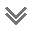

In [21]:
import requests
# to suppress future warnings
import warnings
import pandas as pd
import dask.dataframe as dd
from bs4 import BeautifulSoup

warnings.simplefilter(action='ignore', category=FutureWarning)

page = requests.get("https://www.worldometers.info/coronavirus/#countries")
soup = BeautifulSoup(page.content, 'lxml')

print(soup.prettify())

In [73]:
# Search for the table and extracting it
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

rows = table.find_all("tr", attrs={"style": ""})
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:15])
        
    else:
        data.append(item.text.strip().split("\n")[:15])

dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:15]) #Formatting the header
df = dd.from_pandas(dt,npartitions=1)

In [74]:
dt.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/,1M pop
0,World,"635,548,773","+98,233","6,594,100",+386,"614,763,226","+226,191","14,191,447","36,161","81,535",846.0,,,,All
1,1,USA,"99,345,927",,"1,095,204",,"96,897,652",,"1,353,071","2,609","296,727","3,271","1,128,139,676","3,369,540","334,805,269"
2,2,India,"44,653,592",,"529,024",,"44,106,656",,"17,912",698,"31,745",376,"900,882,915","640,454","1,406,631,776"
3,3,France,"36,809,617",,"156,832",,"35,718,794",,"933,991",869,"561,255","2,391","271,490,188","4,139,547","65,584,518"
4,4,Germany,"35,571,130",,"153,544",,"33,876,300","+54,900","1,541,286","1,406","424,053","1,830","122,332,384","1,458,359","83,883,596"


In [78]:
active_cases = dt['ActiveCases']
populations  = dt['1M pop']

# Remove N/A values
index_na = active_cases[dt['ActiveCases'] == 'N/A'].index
index_all = populations[dt['1M pop'] == 'All'].index

active_cases = active_cases.drop(index_na)
populations  = populations.drop(index_na)

active_cases = active_cases.drop(index_all)
populations  = populations.drop(index_all)

Cleaning process requires both N/A removal and parsing string integers (with commas) to ints. Average active cases below.

In [79]:
# Compute statistics
active_cases = active_cases[:].str.split(',').str.join('').astype(int)
populations  = populations[:].str.split(',').str.join('').astype(int)

print(active_cases.mean())

62625.946601941745


Proportion currently infected

In [80]:
print(active_cases / populations)

1      0.004041
2      0.000013
3      0.014241
4      0.018374
5      0.000648
         ...   
218    0.003827
219    0.028774
220    0.001233
221    0.001906
222    0.000003
Length: 206, dtype: float64
